#**Brain Tumor**!
[datalink](https://www.kaggle.com/datasets/jillanisofttech/brain-tumor)
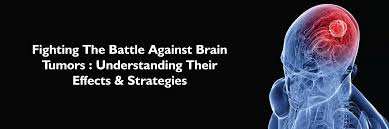

***A brain tumor is an abnormal growth in or around the brain, causing symptoms like headaches and seizures. Treatment often involves surgery, radiation, and chemotherapy. Machine learning can enhance brain tumor management by improving early detection, predicting treatment outcomes, and personalizing care, leading to better patient outcomes.***
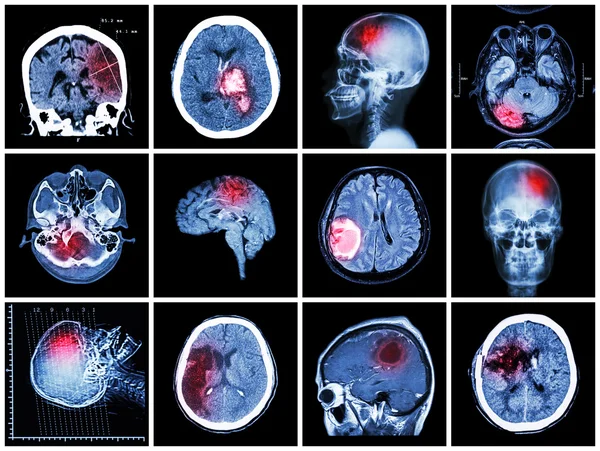

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [2]:
# load dataset
df = pd.read_csv('/content/Brain_Tumor_dataset.csv')
df.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [5]:
df.tail(10)

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
26,26,632,185,4723,1107,3344,1114,166,2100,72,...,0,-12,107,-51,1,-20,3,-4,-103,Normal
27,27,1412,288,-21,731,8,673,298,1033,179,...,9,6,101,-73,6,1,8,-5,39,Normal
28,28,1122,416,-7,1559,5,836,376,1164,190,...,120,5,22,25,0,9,16,-17,-10,Normal
29,29,644,625,-28,1762,-7,799,273,1599,98,...,28,4,119,-21,5,-12,8,15,-97,Normal
30,30,1760,320,-8,917,-2,1060,473,1472,226,...,62,6,71,34,1,-1,19,-10,-1,Normal
31,31,488,564,-29,1303,-9,1236,265,2203,41,...,16,0,109,21,6,-15,11,7,-145,Normal
32,32,164,330,-13,721,12,504,154,1381,78,...,-18,1,-1484,-4,-1,-1,3,-5,-63,Normal
33,33,1282,116,-4,542,0,1070,344,1903,42,...,5,3,128,25,2,0,7,3,-69,Normal
34,34,68,718,-50,1816,-28,251,38,598,73,...,47,-2,190,3,0,8,21,22,-214,Normal
35,35,928,332,4,412,0,681,267,1132,357,...,9,1,67,19,10,1,32,-5,72,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
X53416,0
M83670,0
X90908,0
M97496,0
...,...
M13699.1,0
X54489,0
T55008,0
M10065.2,0


# **Drop Unnamed Column**

In [13]:
# Check if 'Unnamed: 0' is in the DataFrame's columns
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Column 'Unnamed: 0' dropped successfully.")
else:
    print("Column 'Unnamed: 0' not found in the DataFrame.")

df.head()

Column 'Unnamed: 0' not found in the DataFrame.


,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,tumor
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,tumor
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,tumor
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,tumor


In [14]:
df.columns

Index(['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7465)

# Check Unique Values in data

In [15]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

# Statistical Information of data

In [16]:
df.describe()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,378.750000,177.305556,128.027778,568.305556,93.555556,366.833333,140.166667,644.194444,73.444444,68.055556,...,31.750000,71.111111,35.694444,53.194444,38.388889,40.944444,41.222222,57.027778,58.694444,44.027778
std,648.716067,243.494655,787.935802,637.451928,557.527370,427.166645,171.443202,685.514231,88.504219,90.766244,...,50.036201,118.940748,127.437115,269.630628,47.619490,83.763935,251.147778,71.322001,336.030766,224.891782
min,-694.000000,-117.000000,-50.000000,8.000000,-54.000000,-6.000000,-18.000000,-8.000000,-8.000000,-14.000000,...,-21.000000,-24.000000,-12.000000,-1484.000000,-73.000000,-16.000000,-23.000000,-5.000000,-17.000000,-214.000000
25%,-95.750000,-31.000000,-13.250000,47.250000,-7.000000,27.250000,17.750000,33.250000,8.250000,-0.250000,...,1.500000,9.000000,-1.250000,59.250000,12.750000,3.500000,-4.750000,7.000000,-5.000000,-72.750000
50%,194.500000,117.000000,-4.500000,293.500000,3.000000,110.500000,37.500000,333.500000,37.500000,23.500000,...,10.000000,55.500000,3.000000,94.000000,36.000000,7.000000,0.000000,20.000000,1.500000,-12.000000
75%,721.750000,330.500000,14.000000,1079.250000,10.250000,675.000000,268.500000,1185.250000,107.750000,109.250000,...,48.000000,78.750000,6.000000,121.250000,64.000000,39.500000,6.500000,98.250000,7.000000,74.250000
max,1815.000000,718.000000,4723.000000,2261.000000,3344.000000,1354.000000,718.000000,2203.000000,357.000000,357.000000,...,156.000000,686.000000,686.000000,251.000000,138.000000,444.000000,1505.000000,271.000000,2018.000000,1089.000000


#**Label Encoding**

In [18]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['y']=le.fit_transform(df['y'])

In [19]:
df['y'].unique()

array([1, 0])

In [23]:
# split dataset into training and testing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# training data

X_train

array([[-359,  -41,   -2, ...,   51,   -9,  -75],
       [ 644,  625,  -28, ...,    8,   15,  -97],
       [1412,  288,  -21, ...,    8,   -5,   39],
       ...,
       [  68,  718,  -50, ...,   21,   22, -214],
       [ 871,    4,   14, ...,   59,    3,  367],
       [  70,  -81,   25, ...,  123,    2,   19]])

In [22]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1])

In [24]:
# testing data
X_test

array([[ 488,  564,  -29, ...,   11,    7, -145],
       [ 624,  275,  -15, ...,   16,    2,  173],
       [-166,  -23,   20, ...,   87, 2018,  377],
       ...,
       [-343,  -38,   28, ...,  102,   33,  -56],
       [ 133,   45,  -11, ...,   14,    6,   64],
       [  75,   -1,    5, ...,  127,    7,  192]])

In [25]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1])

# Transformation of data

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
# shape of X_train and Y_train
print(X_train.shape)
print(y_train.shape)

(28, 7464)
(28,)


#**Machine Learning(Classification)**


*   Logistic Regression
*   KNN(KNearest Neighbors)
*   Random Forest Classifier
*   Decision Tree Classifier



In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
# prediction

y_pred=lr.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1])

In [31]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


1.0
[[4 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



score :  1.0


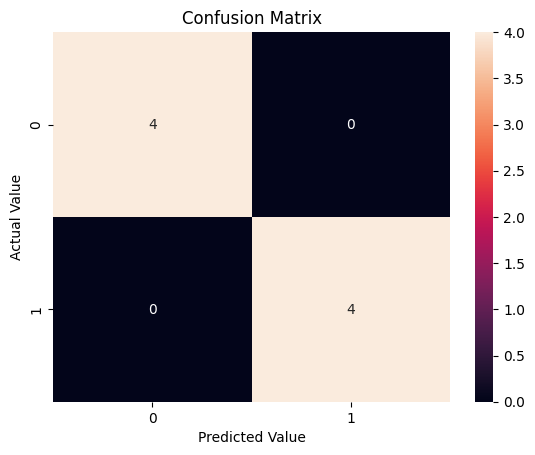

In [37]:
# plotting of confusion metrics of logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of prediction models (replace with your actual models)
pred_list = [lr]  # Assuming 'lr' is your logistic regression model

for i in pred_list:
  print("score : ", i.score(X_test, y_test))
  y_pred = i.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True)
  plt.xlabel("Predicted Value")  # Corrected label to 'xlabel'
  plt.ylabel("Actual Value")
  plt.title("Confusion Matrix")
  plt.show()

#KNearest Neighbours

In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2) # Fixed typo: 'metirc' to 'metric'
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# prediction

y_pred=KNN.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1])

In [42]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

1.0


In [43]:
# Confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[4 0]
 [0 4]]


In [44]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



score :  1.0


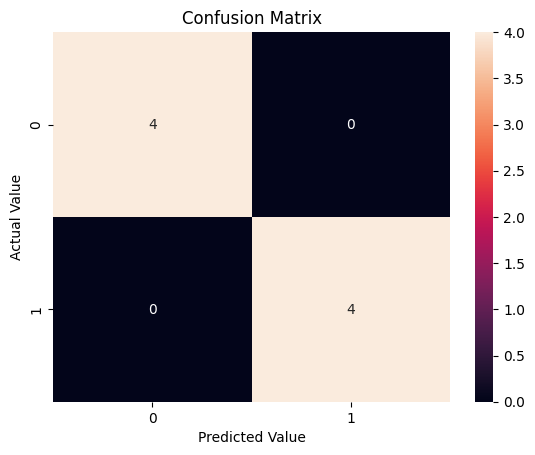

In [45]:
# confusion metrix of KNN
from sklearn.metrics import confusion_matrix
pred_list = [KNN]

for i in pred_list:
  print("score : ", i.score(X_test, y_test))
  y_pred = i.predict(X_test)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
  plt.xlabel("Predicted Value")
  plt.ylabel("Actual Value")
  plt.title("Confusion Matrix")
  plt.show()

# RandomForestClassifier

In [47]:
# model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [48]:
# prediction
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1])

In [49]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

1.0


RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)
score :  1.0


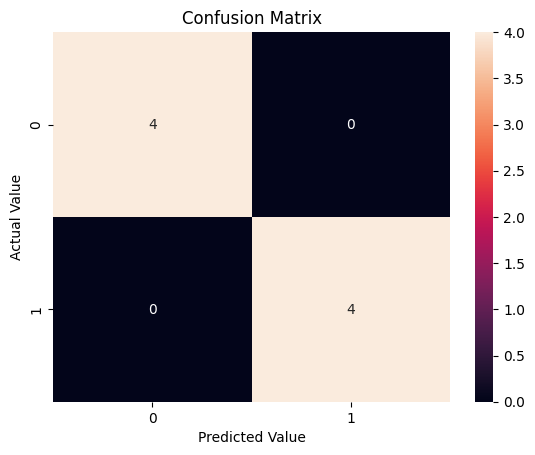

In [53]:
# confusion metrix for random Forest Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(rf)

for i in pred_list:
  print("score : ", i.score(X_test, y_test))
  y_pred = i.predict(X_test)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
  plt.xlabel("Predicted Value")
  plt.ylabel("Actual Value")
  plt.title("Confusion Matrix")
  plt.show()

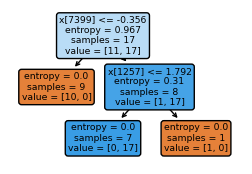

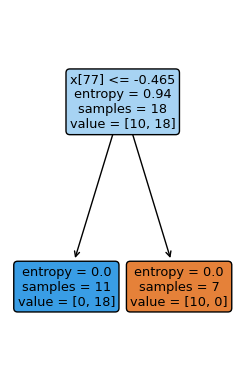

In [62]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(3,2))
plot_tree(rf.estimators_[0],filled=True,rounded=True)
plt.show()

plt.subplot(1,2,2)
plot_tree(rf.estimators_[1],filled=True,rounded=True)
plt.show()

# DecisionTreeClassifier

In [54]:
# model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
# classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)
# prediction
y_pred=dt.predict(X_test)
y_pred

1.0
[[4 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



array([0, 0, 1, 0, 0, 1, 1, 1])

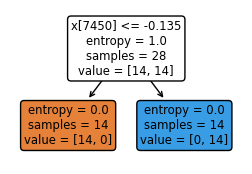

In [61]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(3,2))
plot_tree(dt,filled=True,rounded=True)
plt.show()
#

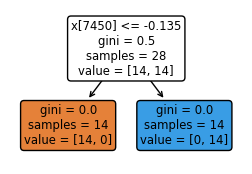

In [65]:
# model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', random_state=0)  # Train with 'gini'
dt.fit(X_train, y_train)

# ... (rest of your model evaluation code)

# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(3,2))  # Adjust figure size for better visibility
plot_tree(dt, filled=True, rounded=True)
plt.show()